# **Analysis of e-commerce dataset using Pandas, Matplotlib and Seaborn**

# Retrieving and Preparing Data

- Loading necessary packages

In [1]:
import os
os.chdir('C:/Users/luisp/Desktop/Biz/Datasets portefolio')

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

- Creating connection object to the Database 

In [6]:
conn= sqlite3.connect('portefolio_database.db')

- Retrieving the dataset and showing first 5 rows

In [7]:
query = "SELECT * FROM ecom_data"
df = pd.read_sql_query(query, conn)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


- Closing the connection to the database

In [8]:
conn.close()

- Coverting InvoiceDate to a datetime type column

In [13]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Plotting the Data

- Making a bar plot that shows the number of individual orders over time

Text(0.5, 1.0, 'Number of individual orders over time')

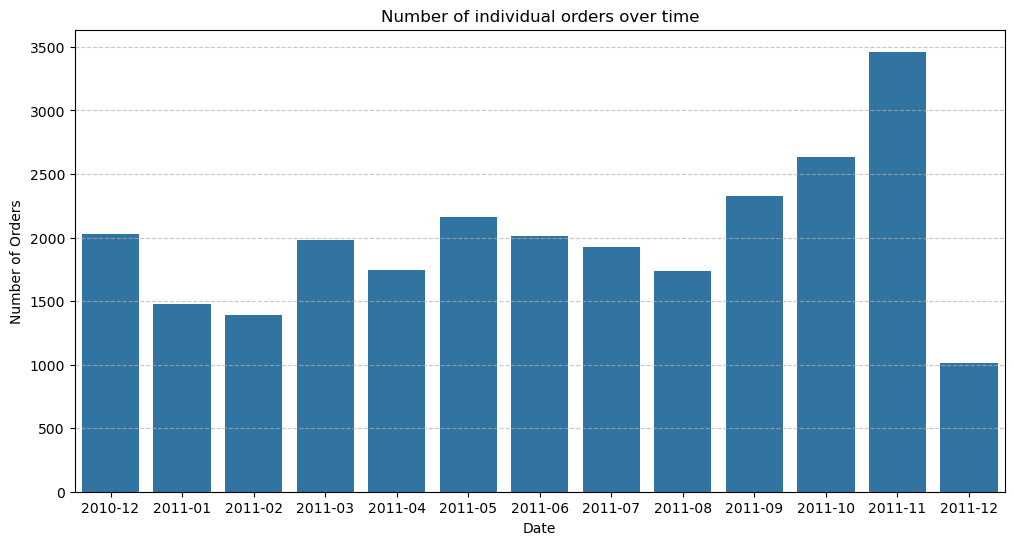

In [71]:
plt.figure(figsize=(12,6))
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
daily_counts = df.groupby('YearMonth')['InvoiceNo'].nunique().reset_index()
daily_counts.columns = ['Date', 'InvoiceCount']
daily_counts['Date'] = daily_counts['Date'].astype(str)
sns.barplot(daily_counts, x='Date', y='InvoiceCount')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.title('Number of individual orders over time')

- Making a bar plot that shows the top 10 most sold items

Text(0.5, 1.0, 'Top 10 most sold items')

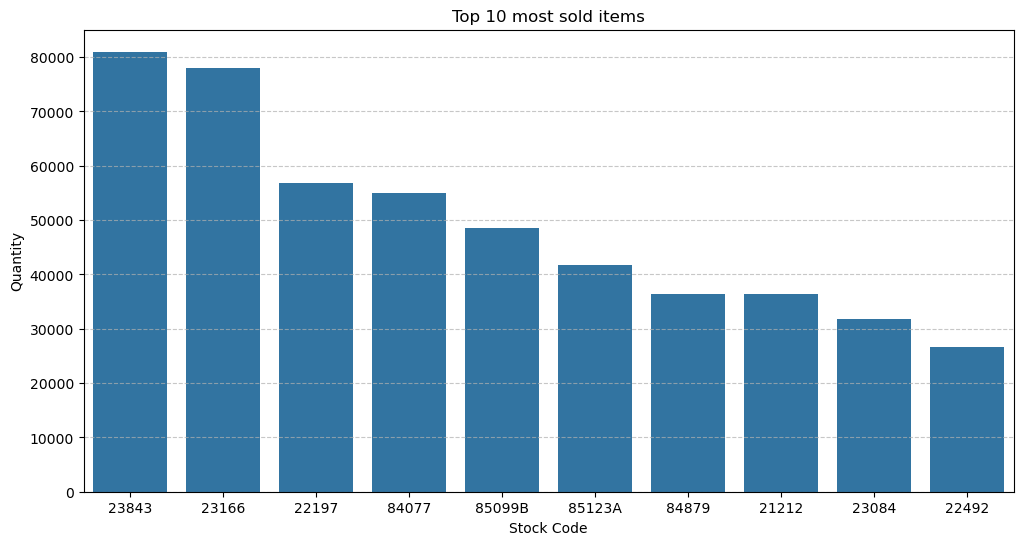

In [70]:
plt.figure(figsize=(12,6))
df_positive= df[df['Quantity']>0]
item_counts = df_positive.groupby('StockCode')['Quantity'].sum().reset_index()
item_counts.columns = ['StockCode', 'Quantity']
top_10 = item_counts.sort_values(by='Quantity', ascending=False).head(10)
sns.barplot(top_10, x='StockCode', y='Quantity')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Stock Code')
plt.ylabel('Quantity')
plt.title('Top 10 most sold items')

- Making a pie plot that shows the top countries with more than 100000 sales

In [46]:
df['TotalSales']= df['Quantity'] * df['UnitPrice']

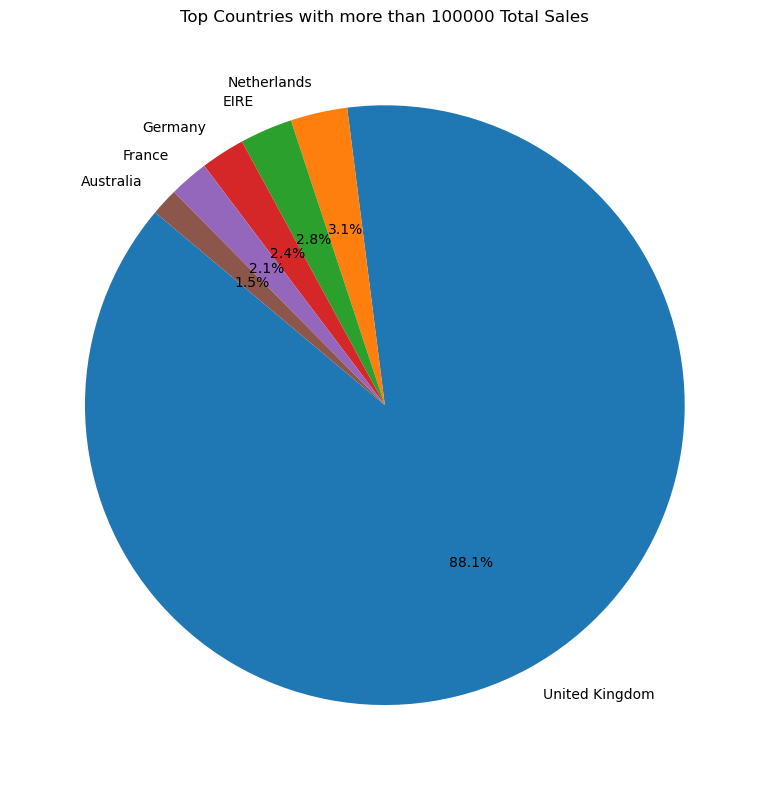

In [69]:
invoice_country_sales = df.groupby(['InvoiceNo', 'Country'])['TotalSales'].sum().reset_index()
country_sales = invoice_country_sales.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 8))
top_countries= country_sales[country_sales > 100000]
top_countries.plot.pie(autopct='%1.1f%%', startangle=140)
plt.ylabel('')
plt.title('Top Countries with more than 100000 Total Sales')
plt.tight_layout()
plt.show()

- Making a bar plot that shows the order volume by time of day

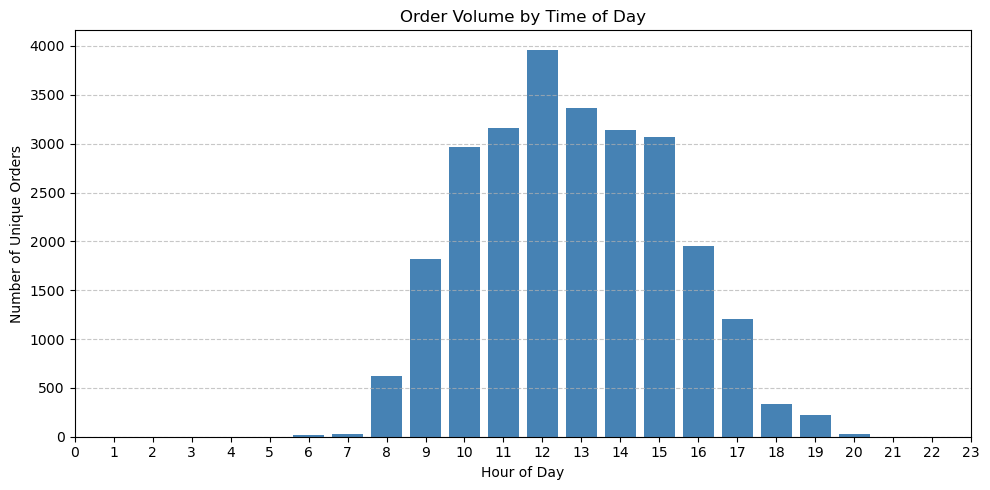

In [67]:
df['Hour'] = df['InvoiceDate'].dt.hour

hourly_orders = df.groupby('Hour')['InvoiceNo'].nunique().reset_index(name='OrderCount')

plt.figure(figsize=(10, 5))
plt.bar(hourly_orders['Hour'], hourly_orders['OrderCount'], color='steelblue')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Unique Orders')
plt.title('Order Volume by Time of Day')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()